<a href="https://colab.research.google.com/github/DATA601-CustSegment-Nov2025-to-Feb2026/New-CustSegment-Project/blob/Tony_preprocessing/Customer_Segmentation_(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Load Datasets

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np

from google.colab import drive

In [11]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Paths to the final merged dataset stored in Google Drive
final_merged_path = '/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/customer_segmentation_after_merging.csv'

# Read the dataset from its CSV file
final_merged_df = pd.read_csv(final_merged_path, low_memory=False)

# Overview of the Dataset

In [13]:
# Show all columns
pd.set_option('display.max_columns', None)

# Display first 5 rows of the dataset
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN


In [14]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 33


In [15]:
# Display the data type of each column in the 'final_merged_df'
print(final_merged_df.dtypes)

household_key             int64
basket_id                 int64
day                       int64
product_id                int64
quantity                  int64
sales_value             float64
store_id                  int64
retail_disc             float64
trans_time                int64
week_no                   int64
coupon_disc             float64
coupon_match_disc       float64
description              object
campaign                float64
start_day               float64
end_day                 float64
received_campaign        object
age_desc                 object
marital_status_code      object
income_desc              object
homeowner_desc           object
hh_comp_desc             object
household_size_desc      object
kid_category_desc        object
manufacturer              int64
department               object
brand                    object
commodity_desc           object
sub_commodity_desc       object
curr_size_of_product     object
display                  object
mailer  

In [16]:
# Show the number of duplicate rows
num_duplicates_final_merged_df = final_merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates_final_merged_df}")

Number of duplicate rows: 0


In [17]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
trans_time                    0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer  

In [18]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


# Data Preprocessing

## Create Time-Of-Day and Cyclical Encoding Variables

In [19]:
# Convert 'trans_time' column to string and pad with zeros to ensure 4 digits
final_merged_df['trans_time'] = final_merged_df['trans_time'].astype(str).str.zfill(4)

# Convert 'trans_time' column in HHMM format
final_merged_df['trans_time_dt'] = pd.to_datetime(final_merged_df['trans_time'], format='%H%M')

# Convert 'trans_time_dt' to total minutes for cyclical encoding
final_merged_df['minutes'] = (
    final_merged_df['trans_time_dt'].dt.hour * 60 +
    final_merged_df['trans_time_dt'].dt.minute
)

# Cyclical encoding
final_merged_df['trans_time_sin'] = np.sin(2 * np.pi * final_merged_df['minutes'] / 1440)
final_merged_df['trans_time_cos'] = np.cos(2 * np.pi * final_merged_df['minutes'] / 1440)

# Convert to time only
final_merged_df['trans_time_dt'] = final_merged_df['trans_time_dt'].dt.time

In [20]:
# Create a function to categorize time-of-day category based on hour
def categorize_time_of_day(dt):
    hour = dt.hour
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:  # 21 <= hour <= 23
        return 'Night'

# Apply function to create new column: 'trans_time_dt'
final_merged_df['trans_time_day'] = final_merged_df['trans_time_dt'].apply(categorize_time_of_day)

In [21]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 38


In [22]:
# Display first 5 rows of the dataset after adding new variables:
# trans_time_dt, minutes, trans_time_sin, trans_time_cos and trans_time_day
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,minutes,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,981,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,1206,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,1148,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,878,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,1061,-0.996566,-0.082808,Evening


## Drop Non-Important Time-Related Variables

In [23]:
# Drop non-important variables related to time
final_merged_df = final_merged_df.drop(columns=['trans_time', 'minutes'])

In [24]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Create Used Retail Discount Variable

In [25]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer                  2031958
coupon_u

In [26]:
# Check the minimum and maximum values of 'retail_disc' variable
min_value_retail_disc = final_merged_df['retail_disc'].min()
max_value_retail_disc = final_merged_df['retail_disc'].max()

print("Minimum value of 'retail_disc' variable:", min_value_retail_disc)
print("Maximum value of of 'retail_disc' variable:", max_value_retail_disc)

Minimum value of 'retail_disc' variable: -180.0
Maximum value of of 'retail_disc' variable: 3.99


In [27]:
# Count transactions where 'retail_disc' variable is positive.
# Positive values in 'retail_disc' variable indicate an issue because discounts are recorded as negative values in this dataset.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 36


In [28]:
# As there are only a very small number of positive values (36) in 'retail_disc' variable, it is likely due data entry.
# So, any value greater than 0 in 'retail_disc' variable is converted to 0.
final_merged_df.loc[final_merged_df['retail_disc'] > 0, 'retail_disc'] = 0

# Count transactions where 'retail_disc' variable is positive after converting to 0.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 0


In [29]:
# Create a 'used_retail_discount' variable:
# If retail_disc < 0, household purchased items with retail discount ("Yes")
# If retail_disc = 0, household purchased items without retail discoun("No")
final_merged_df['used_retailed_discount'] = np.where(final_merged_df['retail_disc'] < 0, 'yes', 'no')

# Move 'used_retailed_discount' variable next to 'retail_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('retail_disc') + 1, all_columns.pop(all_columns.index('used_retailed_discount')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Create Used Coupon Variable

In [30]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
coupon_disc                     0
coupon_match_disc               0
description               1828306
campaign                  1828306
start_day                 1828306
end_day                   1828306
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_p

In [31]:
# Check the minimum and maximum values of 'coupon_disc' variable
min_value_coupon_disc = final_merged_df['coupon_disc'].min()
max_value_coupon_disc = final_merged_df['coupon_disc'].max()

print("Minimum value of 'coupon_disc' variable:", min_value_coupon_disc)
print("Maximum value of of 'coupon_disc' variable:", max_value_coupon_disc)

Minimum value of 'coupon_disc' variable: -55.93
Maximum value of of 'coupon_disc' variable: 0.0


In [32]:
# Create a 'used_coupon' variable:
# If coupon_disc < 0, household used a manufacturer coupon ("Yes")
# If coupon_disc = 0, household did not use a manufacturer coupon ("No")
final_merged_df['used_coupon'] = np.where(final_merged_df['coupon_disc'] < 0, 'yes', 'no')

# Move 'used_coupon' variable next to 'coupon_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('coupon_disc') + 1, all_columns.pop(all_columns.index('used_coupon')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,used_coupon,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,yes,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,yes,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,yes,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,yes,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,yes,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Correct 'received_campaign' Logic Based On Coupon Usage

In [33]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


In [34]:
# 'received_campaign' variable was created to indicate if 'day' in transaction dataset falls within the campaign period (Yes or No)
# Currently, we have:
# 1. 767426 transactions: yes, received campaign. (transaction days fall within the household's campaign period)
# 2. 1828306 transactions: no, did not receive campaign. (transaction days do not fall within the household's campaign period)

# When exploring the dataset, we noticed 4 situations:
# Situation 1: 'campaign' variable has a value and 'used_coupon' = yes → received campaign and used coupon (logical).
# Situation 2: 'campaign' variable has a value and 'used_coupon' = no → received campaign but did not use coupon (logical).
# Situation 3: 'campaign' variable is missing and 'used_coupon' = no → did not receive campaign and did not use coupon (logical).
# Situation 4: 'campaign' variable is missing and 'used_coupon' = yes → did not receive coupon, but used coupon (not logical, indicates missing data).

situation4_missing_data_count = final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no')
].shape[0]

print("Number of missing data in Situation 4:", situation4_missing_data_count)

Number of missing data in Situation 4: 22762


In [35]:
# Therefore, when the 'campaign' variable is missing, 'used_coupon' = yes, and 'received_campaign' = no,
# these 22762 missing values in the 'received_campaign' variable should be set from no to yes.
final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no'),
    'received_campaign'
] = 'yes'

In [36]:
# Count number of 'yes' and 'no' in 'received_campaign' after set some rows from no to yes.
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1805544
yes     790188
Name: count, dtype: int64


## Correct 'description' (Campaign Type) Logic Based On Campaign Receipt

In [37]:
# Count the number of different types of campaign
campaign_type = final_merged_df['description'].value_counts(dropna= False)
print(campaign_type)

description
NaN      1828306
TypeA     508982
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [38]:
# There is 1805544 transactions that did not receive a campaign (no), as shown in 'received campaign' variable
# However, 1828306 transactions have no campaign type (NaN) recorded in 'description' variable.
# This means that 22762 transactions (1828306 - 1805544) are missing data in 'description' variable,
# while the remaining 1805544 do not have campaign type simply because they did not receive a campaign.

# When exploring the dataset, we noticed 3 situations:
# Situation 1: 'received_campaign' variable = no and 'description' variable is missing → did not receive campaign and did not have campaign type (logical).
# Situation 2: 'received_campaign' variable = yes and 'description' variable has a value (any type) → received campaign and had campaign type (logical).
# Situation 3: 'received_campaign' variable = yes and 'description' variable is  missing → received campaign, but did not have campaign type (not logical, indicates missing data).

situation3_missing_data_count = final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna())
].shape[0]

print("Number of missing data in Situation 3:", situation3_missing_data_count)

Number of missing data in Situation 3: 22762


In [39]:
# Therefore, when the 'received_campaign' variable = yes and 'description' variable is  missing,
# these 22762 missing values in the'description' variable should be set from NaN to any campaign type (TypeA, TypeB or TypeC).
# As a form of imputation, we will fill these 22762 missing values with the most frequent campaign type (TypeA).
final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna()),
    'description'
] = 'TypeA'

In [40]:
# Replace the remaining 180544 NaN with 'no'
final_merged_df['description'] = final_merged_df['description'].fillna('no')

In [41]:
# Rename the variable: from desceiption to campaign_type
final_merged_df.rename(columns={'description': 'campaign_type'}, inplace=True)

In [42]:
# Count the number of different types of campaign after set some rows from NaN to TypeA
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
no       1805544
TypeA     531744
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [43]:
# Map campaign type codes to descriptive names for easier interpretation:
# 1. TypeA: Selected 16 coupons based on prior purchase behavior
# 2. TypeB & TypeC: Received all coupons
# 3. no: did not receive any campaign or coupons

campaign_mapping_type_codes_to_names = {
    'TypeA': 'received 16 coupons',
    'TypeB': 'receive all coupons',
    'TypeC': 'receive all coupons',
    'no': 'did not receive campaign and no coupons'
}

# Apply the mapping
final_merged_df['campaign_type'] = final_merged_df['campaign_type'].replace(campaign_mapping_type_codes_to_names )

In [44]:
# Count the number of different types of campaign after replacing campaign type codes with descriptive names
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
did not receive campaign and no coupons    1805544
received 16 coupons                         531744
receive all coupons                         258444
Name: count, dtype: int64


## Drop Non-Important Campaign- & Coupon-Related Variables

In [45]:
# Drop non-important variables related to campaign & coupon
# Reason for dropping these variables:
# 1. 'campaign', 'start_day, end_day'- we have extracted whether the transaction is part of campaign ('received_campaign' variable)
#                                      based on campaign number and transaction day
# 2. 'coupon_upc' - contains many missing values and is not imprtant for customer segmentation.

final_merged_df = final_merged_df.drop(columns=['campaign', 'start_day', 'end_day', 'coupon_upc'])

In [46]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,yes,0.0,received 16 coupons,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,yes,0.0,received 16 coupons,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,yes,0.0,received 16 coupons,yes,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Handle Missing Values & Categorize Different Groups in the 'display' Variable

In [47]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
coupon_disc                     0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                   2031958
mailer        

In [48]:
# Count the number of different types of display in the 'display variable'.
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
NaN    2031958
0       290123
7        55114
2        41114
3        39580
5        39557
9        38388
1        19732
6        17569
A        15247
4         7350
Name: count, dtype: int64


In [49]:
# We were unsure why there are 2031958 missing values (NaN) in the 'display' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# The clustering model may recognize that some households lack information in 'display' variable and that pattern might mean something

# We are not peforming imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'display' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 11 categories into 3 categories to avoid  the curse of dimensionaltiy.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.


# Classify the 'display' variable into three categories:
def classify_display(x):
    if pd.isna(x):
        return 'Missing Display Info'
    elif x == "0":
        return 'Not Displayed'
    else:
        return 'Displayed'

final_merged_df['display'] = final_merged_df['display'].apply(classify_display)

In [50]:
# Count the number of different types of display in the 'display variable' after classify them into three categories
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
Missing Display Info    2031958
Not Displayed            290123
Displayed                273651
Name: count, dtype: int64


## Handle Missing Values & Categorize Different Groups in the 'mailer' Variable

In [51]:
# Count the number of different types of mailer in the 'mailer variable'.
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
NaN    2031958
A       213094
0       149625
D       128894
F        30276
H        27350
J         4476
C         4244
L         3984
X         1545
Z          286
Name: count, dtype: int64


In [52]:
# We were unsure why there are 2031958 missing values (NaN) in the 'mailer' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# The clustering model may recognize that some households lack information in 'mailer' variable and that pattern might mean something

# We are not peforming imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'mailer' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 12 categories into 3 categories to avoid  the curse of dimensionaltiy.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.

# Classify the 'mailer' variable into three categories:
def classify_mailer(x):
    if pd.isna(x):
        return 'Missing Advertisment Info'
    elif x == "0":
        return 'Not on Advertisement'
    else:
        return 'On Advertisement'

final_merged_df['mailer'] = final_merged_df['mailer'].apply(classify_mailer)

In [53]:
# Count the number of different types of mailer in the 'mailer variable' after classify them into three categories
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
Missing Advertisment Info    2031958
On Advertisement              414149
Not on Advertisement          149625
Name: count, dtype: int64


In [54]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
coupon_disc                     0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                         0
mailer        

Create RFM variable

In [57]:
# Check the minimum and maximum values of 'coupon_disc' variable
min_day = final_merged_df['day'].min()
max_day = final_merged_df['day'].max()

print("Minimum value of 'day' variable:", min_value_coupon_disc)
print("Maximum value of of 'day' variable:", max_value_coupon_disc)


Minimum value of 'day' variable: -55.93
Maximum value of of 'day' variable: 0.0


In [58]:
# create recency variable
recency_df = final_merged_df.groupby('household_key').agg(
    last_purchase_day=('day', 'max')
).reset_index()

recency_df['Recency'] = max_day - recency_df['last_purchase_day']

In [60]:
# create frequency variable
frequency_df = final_merged_df.groupby('household_key')['basket_id'].nunique().reset_index()
frequency_df.columns = ['household_key', 'Frequency']

In [62]:
# create monetary variable
monetary_df = final_merged_df.groupby('household_key')['sales_value'].sum().reset_index()
monetary_df.columns = ['household_key', 'Monetary']

In [63]:
rfm = recency_df[['household_key', 'Recency']] \
    .merge(frequency_df, on='household_key') \
    .merge(monetary_df, on='household_key')

In [65]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


In [66]:
rfm['RFM_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

In [68]:
rfm

,household_key,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,1,5,86,4330.16,3,3,4,10
1,2,43,45,1954.34,1,2,3,6
2,3,8,47,2653.21,3,2,3,8
3,4,84,30,1200.11,1,1,2,4
4,5,8,40,779.06,3,2,2,7
...,...,...,...,...,...,...,...,...
2495,2496,28,63,4339.66,1,3,4,8
2496,2497,11,221,7111.98,2,5,5,12
2497,2498,1,172,2601.60,5,5,3,13
2498,2499,2,90,3394.07,4,3,4,11


In [67]:
final_merged_df.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,yes,0.0,received 16 coupons,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,Missing Display Info,Missing Advertisment Info,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,Missing Display Info,Missing Advertisment Info,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,Missing Display Info,Missing Advertisment Info,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,yes,0.0,received 16 coupons,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,Not Displayed,On Advertisement,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,yes,0.0,received 16 coupons,yes,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,Missing Display Info,Missing Advertisment Info,17:41:00,-0.996566,-0.082808,Evening


Clustering for RFM

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [74]:
#Prepare features for clustering
rfm["Monetary_log"] = np.log1p(rfm["Monetary"])
rfm["Frequency_log"] = np.log1p(rfm["Frequency"])
rfm["Recency_log"] = np.log1p(rfm["Recency"])

# choose features
features = rfm[["Recency", "Frequency_log", "Monetary_log"]].copy()

# scale
scaler = StandardScaler()
X = scaler.fit_transform(features)

K-Means clustering for RFM

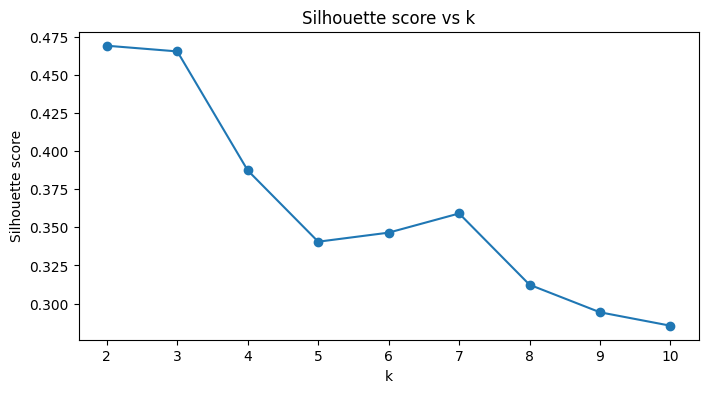

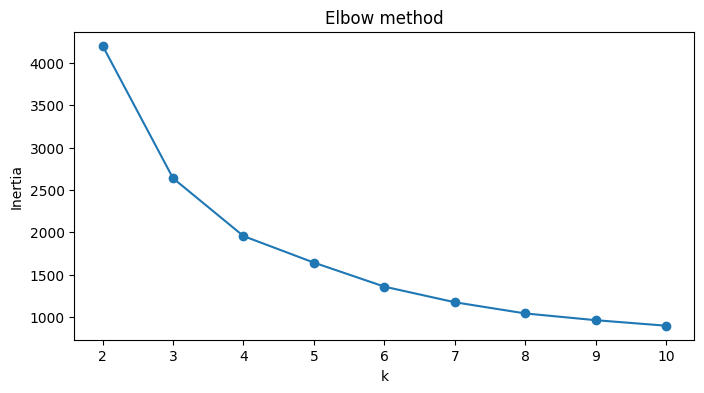

In [75]:
# try different k
ks = range(2, 11)
sil_scores = []
inertia = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sil = silhouette_score(X, km.labels_)
    sil_scores.append(sil)
    inertia.append(km.inertia_)

# plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(ks, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k")
plt.show()

# plot inertia elbow
plt.figure(figsize=(8, 4))
plt.plot(ks, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

Fit final K‑Means and attach cluster labels

In [76]:
k_opt = 4
km_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
rfm["cluster_km"] = km_final.fit_predict(X)

# cluster centers in scaled space, optional back-transform
centers_scaled = km_final.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(
    centers,
    columns=features.columns
)
print("Cluster centers (unscaled):")
print(centers_df)

Cluster centers (unscaled):
      Recency  Frequency_log  Monetary_log
0    6.818086       5.204091      8.590258
1  359.181818       2.067867      5.146673
2   15.273855       4.114310      7.407129
3   48.630045       3.001519      5.957119


Inspect cluster sizes and basic stats

In [77]:
print(rfm["cluster_km"].value_counts().sort_index())

# summarise RFM by cluster
print(
    rfm.groupby("cluster_km")[["Recency", "Frequency", "Monetary"]]
    .agg(["count", "mean", "median"])
)

cluster_km
0     951
1      55
2    1048
3     446
Name: count, dtype: int64
           Recency                    Frequency                    Monetary  \
             count        mean median     count        mean median    count   
cluster_km                                                                    
0              951    6.818086    2.0       951  207.566772  166.0      951   
1               55  359.181818  304.0        55    9.236364    7.0       55   
2             1048   15.273855    7.0      1048   65.508588   61.0     1048   
3              446   48.630045   34.0       446   22.257848   20.0      446   

                                   
                   mean    median  
cluster_km                         
0           6201.764669  5246.670  
1            285.280727   183.040  
2           1846.023273  1689.370  
3            469.197422   408.555  


Hierarchical clustering

Compute linkage and plot dendrogram

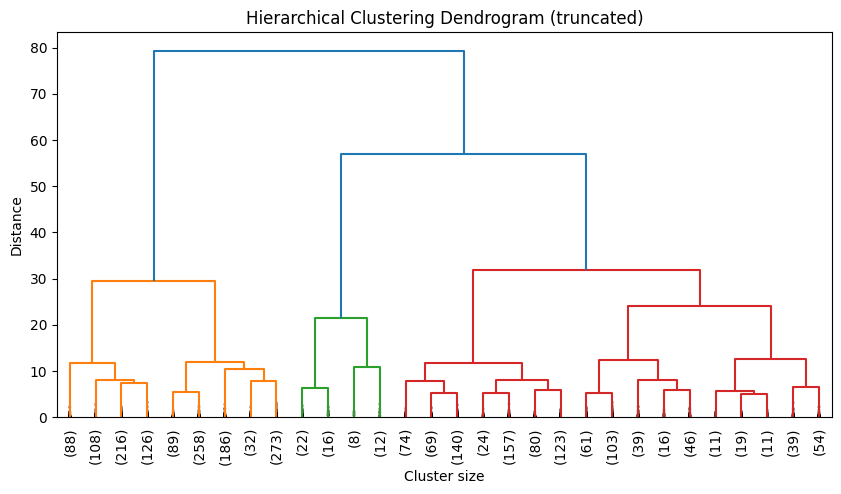

In [78]:
# use Ward linkage on scaled RFM
Z = linkage(X, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

Extract clusters at chosen number or distance

In [80]:
n_clusters = 4
rfm["cluster_hier"] = fcluster(Z, n_clusters, criterion="maxclust")

Summarize hierarchical clusters

In [81]:
print(rfm["cluster_hier"].value_counts().sort_index())

print(
    rfm.groupby("cluster_hier")[["Recency", "Frequency", "Monetary"]]
    .agg(["count", "mean", "median"])
)

cluster_hier
1    1376
2      58
3     667
4     399
Name: count, dtype: int64
             Recency                    Frequency                    Monetary  \
               count        mean median     count        mean median    count   
cluster_hier                                                                    
1               1376    7.097384    3.0      1376  168.284157  133.0     1376   
2                 58  347.844828  296.5        58    9.034483    7.0       58   
3                667   14.191904    9.0       667   51.059970   45.0      667   
4                399   61.473684   49.0       399   25.924812   19.0      399   

                                     
                     mean    median  
cluster_hier                         
1             5074.207580  3981.235  
2              235.128448   177.180  
3             1228.367346  1169.970  
4              607.506216   404.960  


Compare K‑Means vs Hierarchical

In [82]:
pd.crosstab(rfm["cluster_km"], rfm["cluster_hier"], margins=True)

cluster_hier,1,2,3,4,All
cluster_km,,,,,
0,944,0,0,7,951
1,0,53,0,2,55
2,432,0,585,31,1048
3,0,5,82,359,446
All,1376,58,667,399,2500
